# Importing Libraries

In [42]:
import numpy as np #Linear Algebra
import pandas as pd #data processing
import matplotlib.pyplot as plt #data visualization
import seaborn as sns #data visualization
from matplotlib.pyplot import figure as fig

# Pre-processing Data

### Loading Data

In [20]:
data = pd.read_csv("BSE_30_Data.csv")

In [21]:
data_pivot = data.pivot_table(index=['Symbol', 'Date'] )
df = data_pivot.loc['ADANIPORTS']

### Creating Date as index and sorting

In [24]:
df.index = pd.to_datetime(df.index)

In [29]:
df = df.sort_index()

In [30]:
df

,Adj Close,Close,High,Low,Open,Volume
Date,,,,,,
2008-05-06,134.313477,151.149994,153.570007,147.820007,150.000000,1782030.0
2008-05-07,136.232864,153.309998,154.460007,150.240005,152.000000,1180015.0
2008-05-08,138.525497,155.889999,156.759995,150.199997,152.199997,1856245.0
2008-05-09,139.085312,156.520004,160.600006,154.210007,155.000000,3251375.0
2008-05-12,144.399170,162.500000,163.479996,151.000000,156.000000,5031635.0
...,...,...,...,...,...,...
2018-04-27,401.450012,401.450012,405.049988,399.000000,399.000000,109595.0
2018-04-30,406.450012,406.450012,410.799988,399.000000,406.899994,107863.0
2018-05-02,399.899994,399.899994,411.000000,396.600006,407.100006,119475.0


## Population Parameters

In [31]:
df.describe()

,Adj Close,Close,High,Low,Open,Volume
count,2461.000000,2461.000000,2461.000000,2461.000000,2461.000000,2.461000e+03
mean,197.498449,201.333824,205.175567,197.970565,201.850301,6.102323e+05
std,99.074643,97.239175,98.362379,96.067389,97.525373,1.362010e+06
min,46.345108,51.480000,52.500000,50.000000,50.220001,0.000000e+00
25%,125.413712,129.500000,132.550003,127.000000,130.000000,1.505960e+05
50%,149.513397,154.199997,157.449997,151.500000,154.199997,2.662290e+05
75%,281.410828,284.350006,288.149994,277.450012,283.899994,5.599650e+05
max,448.200012,448.200012,451.549988,433.299988,449.000000,3.279051e+07


# Visualization

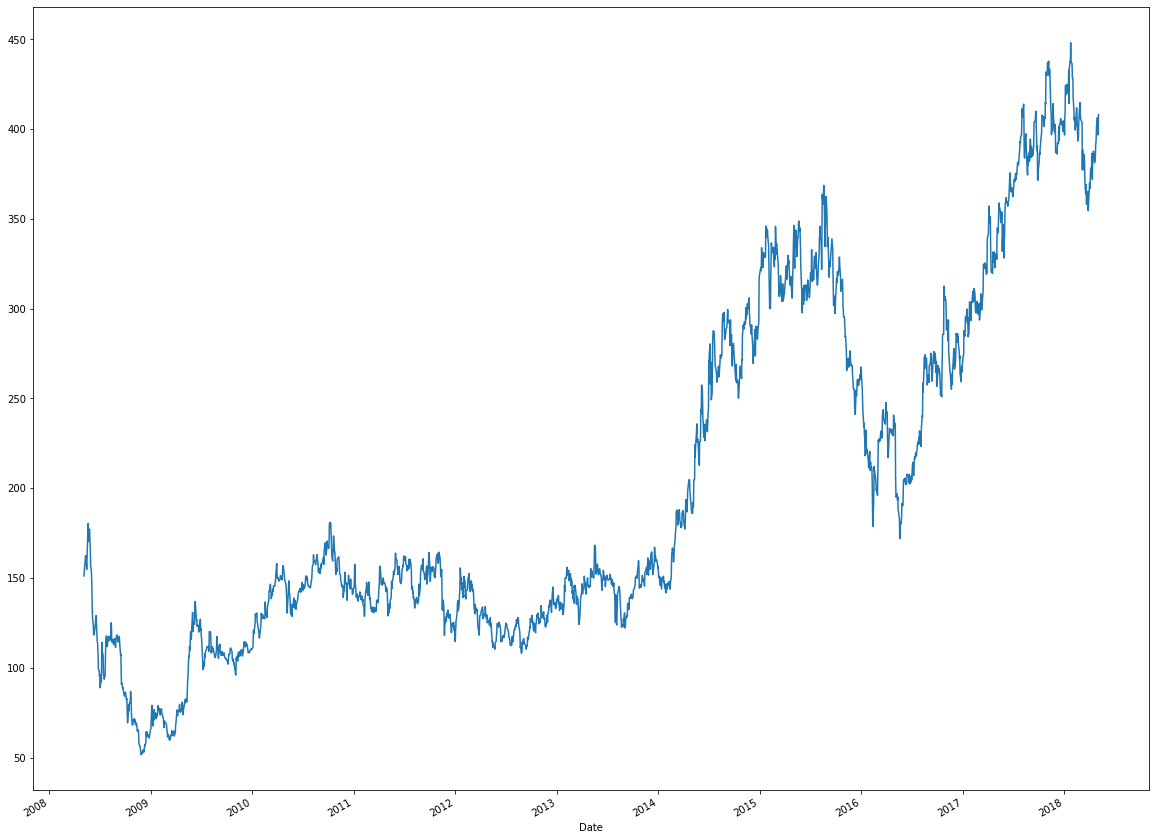

In [33]:
plt.figure(figsize=(20, 16))
df['Close'].plot()
plt.show()

## Calculating Daily Returns

#### Making new Price Difference Column

In [34]:
df['PriceDiff'] = df['Close'].shift(-1) - df['Close']

In [36]:
df.head()

,Adj Close,Close,High,Low,Open,Volume,PriceDiff
Date,,,,,,,
2008-05-06,134.313477,151.149994,153.570007,147.820007,150.000000,1782030.0,2.160004
2008-05-07,136.232864,153.309998,154.460007,150.240005,152.000000,1180015.0,2.580001
2008-05-08,138.525497,155.889999,156.759995,150.199997,152.199997,1856245.0,0.630005
2008-05-09,139.085312,156.520004,160.600006,154.210007,155.000000,3251375.0,5.979996
2008-05-12,144.399170,162.500000,163.479996,151.000000,156.000000,5031635.0,-4.020004


### Creating new Daily Return Column 

In [37]:
df['Return'] = df['PriceDiff'] /df['Close']
df.head()

,Adj Close,Close,High,Low,Open,Volume,PriceDiff,Return
Date,,,,,,,,
2008-05-06,134.313477,151.149994,153.570007,147.820007,150.000000,1782030.0,2.160004,0.014290
2008-05-07,136.232864,153.309998,154.460007,150.240005,152.000000,1180015.0,2.580001,0.016829
2008-05-08,138.525497,155.889999,156.759995,150.199997,152.199997,1856245.0,0.630005,0.004041
2008-05-09,139.085312,156.520004,160.600006,154.210007,155.000000,3251375.0,5.979996,0.038206
2008-05-12,144.399170,162.500000,163.479996,151.000000,156.000000,5031635.0,-4.020004,-0.024738


## Graph of Daily Returns

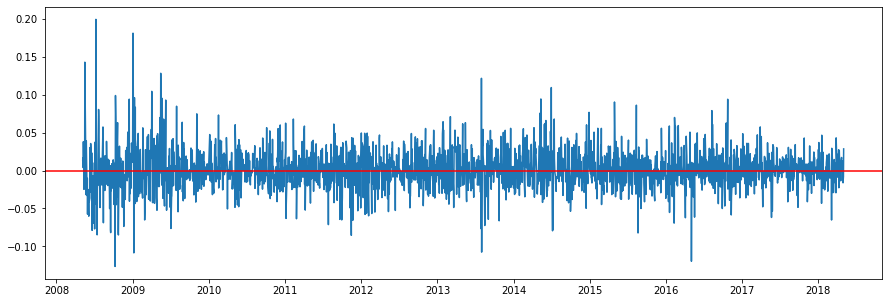

In [50]:
plt.figure(figsize=(15,5))
plt.plot(df['Return'])
plt.axhline(y=0, color='red')

# Plotting MA10 and MA50

### MA == Moving Average

In [71]:
df['MA10'] = df['Close'].rolling(10).mean()
df['MA50'] = df['Close'].rolling(50).mean()
df = df.dropna()
df.head()

C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,Adj Close,Close,High,Low,Open,Volume,PriceDiff,Return,MA10,MA50
Date,,,,,,,,,,
2008-09-24,80.185684,89.070000,90.199997,88.320000,89.139999,1099455.0,-1.250000,-0.014034,99.071,110.1922
2008-09-25,79.060371,87.820000,89.900002,87.510002,89.900002,573310.0,-1.659996,-0.018902,96.256,109.9898
2008-09-26,77.565941,86.160004,88.220001,85.800003,87.339996,971290.0,-1.990006,-0.023097,93.611,109.8006
2008-09-29,75.774437,84.169998,86.199997,81.400002,86.199997,1226510.0,1.200005,0.014257,91.332,109.5736
2008-09-30,76.854744,85.370003,86.000000,77.690002,82.199997,1367970.0,1.000000,0.011714,89.129,109.4082


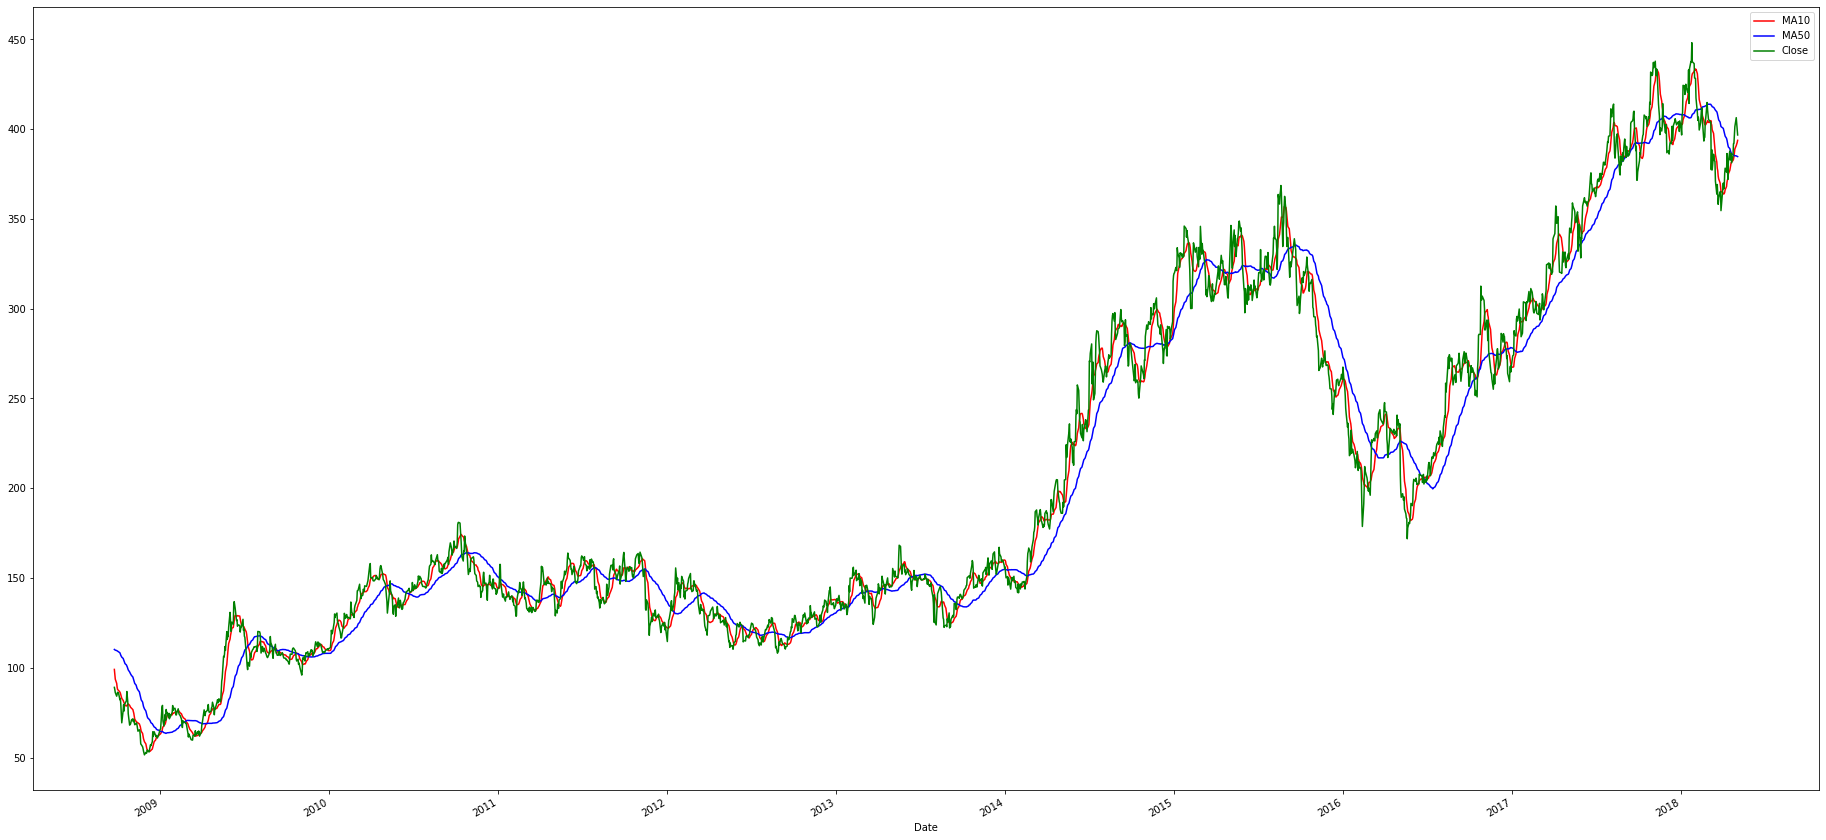

In [72]:
#Plot
plt.figure(figsize=(32,16))
plt.plot(df['MA10'], label='MA10', color='red')
df['MA50'].plot(label='MA50', color='blue')
df['Close'].plot(label='Close', color='green')
plt.legend()
plt.show()

We will form a strategy based on Moving Averages as some trend following traders believe that when MA(10) is above MA(50) we should buy the stock else short. Similarly some trend following traders stratefise for MA(60) and MA(200)

# Building a simple stock trading strategy based upon MA(10) and MA(50) 

In [73]:
#Add a new column "Shares", if MA10>MA50, denote as 1 (long one share of stock), otherwise, denote as 0 (do nothing)

df['Shares'] = [1 if df.loc[ei, 'MA10']>df.loc[ei, 'MA50'] else 0 for ei in df.index]

C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [76]:
df

,Adj Close,Close,High,Low,Open,Volume,PriceDiff,Return,MA10,MA50,Shares
Date,,,,,,,,,,,
2008-09-24,80.185684,89.070000,90.199997,88.320000,89.139999,1099455.0,-1.250000,-0.014034,99.071000,110.1922,0
2008-09-25,79.060371,87.820000,89.900002,87.510002,89.900002,573310.0,-1.659996,-0.018902,96.256000,109.9898,0
2008-09-26,77.565941,86.160004,88.220001,85.800003,87.339996,971290.0,-1.990006,-0.023097,93.611000,109.8006,0
2008-09-29,75.774437,84.169998,86.199997,81.400002,86.199997,1226510.0,1.200005,0.014257,91.332000,109.5736,0
2008-09-30,76.854744,85.370003,86.000000,77.690002,82.199997,1367970.0,1.000000,0.011714,89.129000,109.4082,0
...,...,...,...,...,...,...,...,...,...,...,...
2018-04-26,396.450012,396.450012,398.000000,388.000000,391.000000,131982.0,5.000000,0.012612,387.060004,385.2980,1
2018-04-27,401.450012,401.450012,405.049988,399.000000,399.000000,109595.0,5.000000,0.012455,389.010004,385.2550,1
2018-04-30,406.450012,406.450012,410.799988,399.000000,406.899994,107863.0,-6.550018,-0.016115,390.875006,385.1460,1


C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  import sys


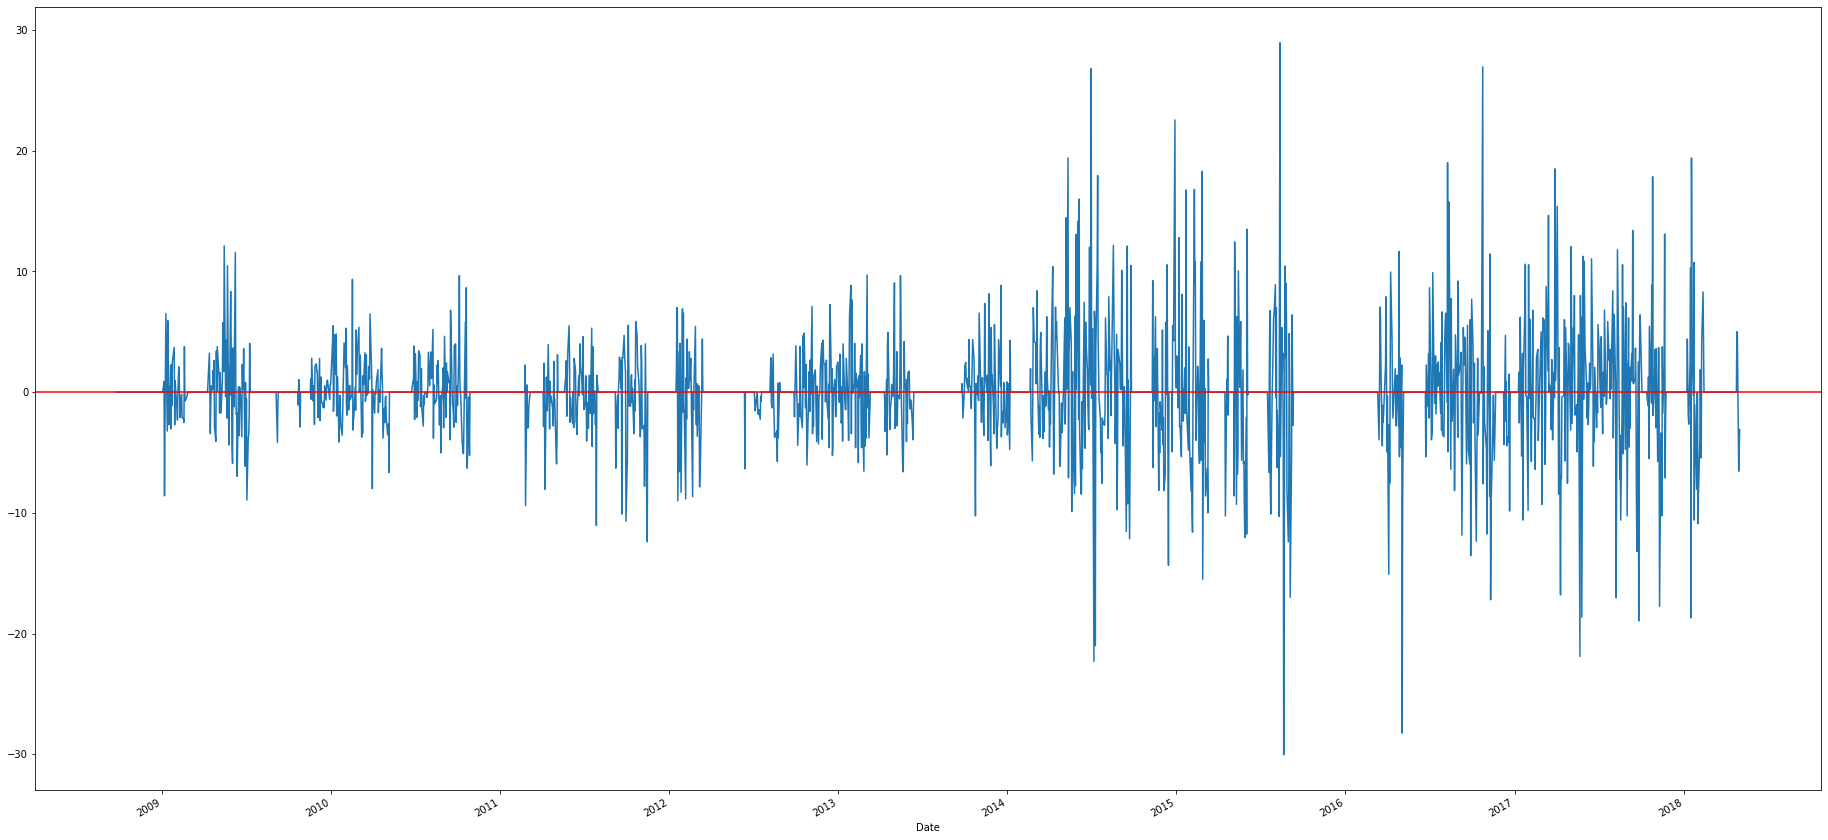

In [78]:
#Add a new column "Profit" using List Comprehension, for any rows in df, if Shares=1, the profit is calculated as the close price of 
#tomorrow - the close price of today. Otherwise the profit is 0.

#Plot a graph to show the Profit/Loss
plt.figure(figsize=(32,16))
df['Close1'] = df['Close'].shift(-1)
df['Profit'] = [df.loc[ei, 'Close1'] - df.loc[ei, 'Close'] if df.loc[ei, 'Shares']==1 else 0 for ei in df.index]
df['Profit'].plot()
plt.axhline(y=0, color='red')

## Using .cumsum() to display our model's performance if we follow the strategy

In [79]:
#Use .cumsum() to calculate the accumulated wealth over the period

df['wealth'] = df['Profit'].cumsum()
df.tail()

C:\Users\Rakesh Bhugra\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Adj Close,Close,High,Low,Open,Volume,PriceDiff,Return,MA10,MA50,Shares,Close1,Profit,wealth
Date,,,,,,,,,,,,,,
2018-04-26,396.450012,396.450012,398.000000,388.000000,391.000000,131982.0,5.000000,0.012612,387.060004,385.298,1,401.450012,5.000000,80.710053
2018-04-27,401.450012,401.450012,405.049988,399.000000,399.000000,109595.0,5.000000,0.012455,389.010004,385.255,1,406.450012,5.000000,85.710053
2018-04-30,406.450012,406.450012,410.799988,399.000000,406.899994,107863.0,-6.550018,-0.016115,390.875006,385.146,1,399.899994,-6.550018,79.160035
2018-05-02,399.899994,399.899994,411.000000,396.600006,407.100006,119475.0,-3.100006,-0.007752,392.580005,384.916,1,396.799988,-3.100006,76.060029
2018-05-03,396.799988,396.799988,406.399994,394.299988,399.899994,191133.0,11.400024,0.028730,393.805005,384.764,1,NaN,NaN,NaN


Text(0.5, 1.0, 'Total money you win is 76.060029')

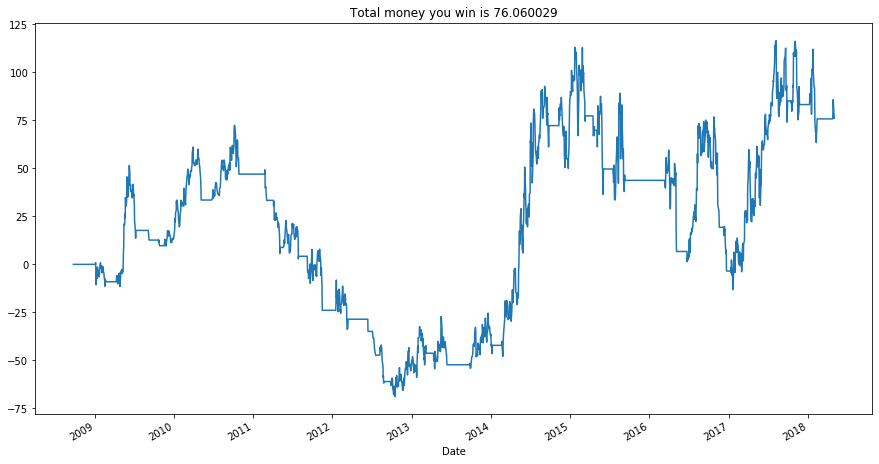

In [82]:
#plot the wealth to show the growth of profit over the period
plt.figure(figsize=(15,8))
df['wealth'].plot()
plt.title('Total money you win is {}'.format(df.loc[df.index[-2], 'wealth']))

By following the above strategy we made Rs. 76.060029 profit

# Models of Stock Return

## Distribution of Log return

In [85]:
df['LogReturn'] = np.log(df['Close'].shift(-1)) - np.log(df['Close'])
df

,Adj Close,Close,High,Low,Open,Volume,PriceDiff,Return,MA10,MA50,Shares,Close1,Profit,wealth,LogReturn
Date,,,,,,,,,,,,,,,
2008-09-24,80.185684,89.070000,90.199997,88.320000,89.139999,1099455.0,-1.250000,-0.014034,99.071000,110.1922,0,87.820000,0.000000,0.000000,-0.014133
2008-09-25,79.060371,87.820000,89.900002,87.510002,89.900002,573310.0,-1.659996,-0.018902,96.256000,109.9898,0,86.160004,0.000000,0.000000,-0.019083
2008-09-26,77.565941,86.160004,88.220001,85.800003,87.339996,971290.0,-1.990006,-0.023097,93.611000,109.8006,0,84.169998,0.000000,0.000000,-0.023368
2008-09-29,75.774437,84.169998,86.199997,81.400002,86.199997,1226510.0,1.200005,0.014257,91.332000,109.5736,0,85.370003,0.000000,0.000000,0.014156
2008-09-30,76.854744,85.370003,86.000000,77.690002,82.199997,1367970.0,1.000000,0.011714,89.129000,109.4082,0,86.370003,0.000000,0.000000,0.011646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-26,396.450012,396.450012,398.000000,388.000000,391.000000,131982.0,5.000000,0.012612,387.060004,385.2980,1,401.450012,5.000000,80.710053,0.012533
2018-04-27,401.450012,401.450012,405.049988,399.000000,399.000000,109595.0,5.000000,0.012455,389.010004,385.2550,1,406.450012,5.000000,85.710053,0.012378
2018-04-30,406.450012,406.450012,410.799988,399.000000,406.899994,107863.0,-6.550018,-0.016115,390.875006,385.1460,1,399.899994,-6.550018,79.160035,-0.016246


We Plot a histogram to show the distribution of log return of stock.  
 We can see it is very close to a normal distribution

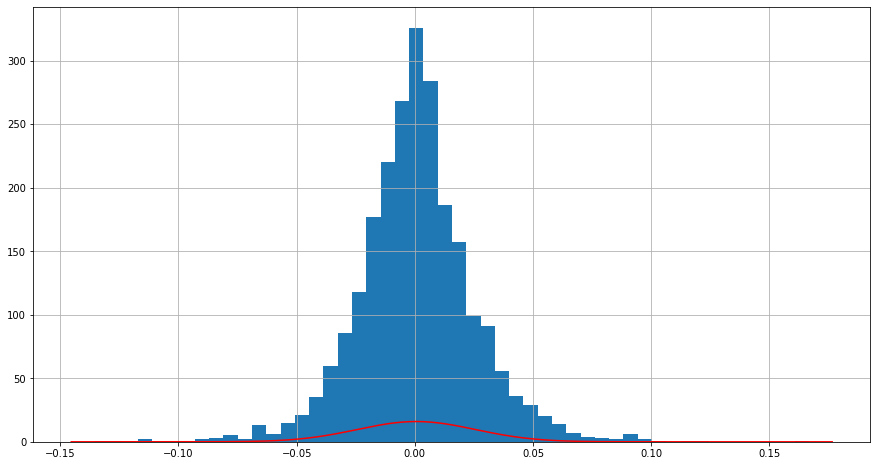

In [88]:
from scipy.stats import norm

mu = df['LogReturn'].mean()

sigma = df['LogReturn'].std()

density = pd.DataFrame()
density['x'] = np.arange(df['LogReturn'].min()-0.01, df['LogReturn'].max()+0.01, 0.001)
density['pdf'] = norm.pdf(density['x'], mu, sigma)

df['LogReturn'].hist(bins=50, figsize=(15,8))
plt.plot(density['x'], density['pdf'], color='red')
plt.show()

## Calculate the probability of the stock price will drop over a certain percentage in a day

In [94]:
prob_return1 = norm.cdf(-.05, mu, sigma)
print('The Probability of 5% drop is ', prob_return1)

The Probability of 5% drop is  0.021362000853915503


In [95]:
prob_return1 = norm.cdf(-.10, mu, sigma)
print('The Probability of 10% drop is ', prob_return1)

The Probability of 10% drop is  2.8189983130176184e-05


## Calculate the probability of the stock price will drop over a certain percentage over a period of time

In [97]:
# drop over 40% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
print('The probability of dropping over 40% in 220 days is ', norm.cdf(-0.4, mu220, sigma220))

The probability of dropping over 40% in 220 days is  0.0728443449704335


In [98]:
# drop over 20% in 220 days
mu220 = 220*mu
sigma220 = (220**0.5) * sigma
drop20 = None
print('The probability of dropping over 20% in 220 days is ', drop20)

The probability of dropping over 20% in 220 days is  None


# Calculate Value at risk (VaR)

In [100]:
# Value at risk(VaR)
VaR = norm.ppf(0.05, mu, sigma)
print('Single day value at risk ', VaR)

Single day value at risk  -0.04046650235955229


# Quantiles

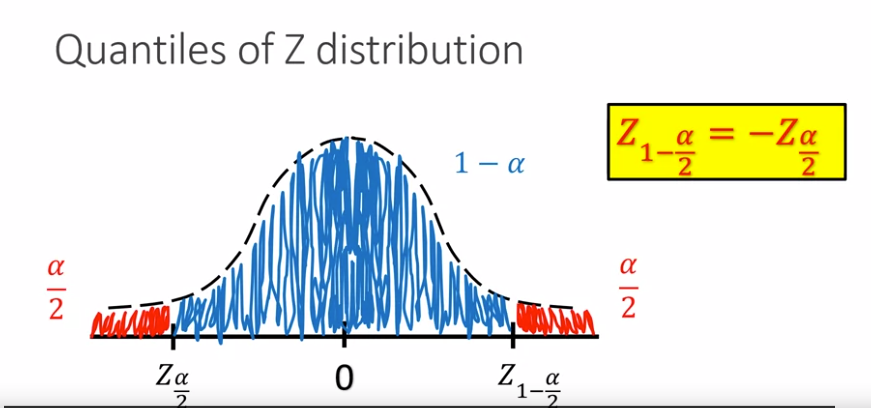

In [112]:
from IPython.display import Image
Image(filename='Quantiles of Z  distribution.png')

In [101]:
# Quatile 
# 5% quantile
print('5% quantile ', norm.ppf(0.05, mu, sigma))
# 95% quantile
print('95% quantile ', norm.ppf(0.95, mu, sigma))

5% quantile  -0.04046650235955229
95% quantile  0.04173207607215287


In [102]:
# This is your turn to calcuate the 25% and 75% Quantile of the return
# 25% quantile
q25 = norm.ppf(.25, mu, sigma)
print('25% quantile ', q25)
# 75% quantile
q75 = norm.ppf(.75, mu, sigma)
print('75% quantile ', q75)

25% quantile  -0.016220414463390603
75% quantile  0.017485988175991198


# Confidence Intervals

Exploring how to estimate the average return using confidence interval

 We can sample mean to estimate the real average return, which is population mean in our example. We want to do more about estimation. Intuitionally, if a sample is a good representative of the population, the population mean should be close to sample mean. It is plausible to say that the population mean is in a range with sample mean centered. Hence, we estimate population mean using interval with lower and upper bound.


To start with, we need to standardize sample mean because different sample has different mean and a standard deviation. We have learned that distribution of sample mean is normal. We can standardize sample mean by minus it's mean, which is identical to population mean and then divided by its standard deviation, which is the standard deviation of population divided by square root of sample size. After standardization, it'll become standard normal, and follows Z-distribution. For Z-distribution, it is not difficult to find the two quantities; Z Alpha over two, and Z, one minus Alpha over two such that in the middle, the probability is one minus Alpha. Since Z is symmetric with respect to zero, the magnitudes of these two quantiles are the same except the sign. We have Z_1 minus Alpha over two equal to negative Z Alpha over two. Since the standardization form of sample mean is also Z, then we have this equation.

With some calculation in the parenthesis, we can have this form, which explicitly gives the upper and lower bounds for population mean. Notice that Sigma is the population standard deviation, which is usually unknown. In practice, we can replace it using the sample standard deviation if sample size is large enough. The interval here, for Mu is called confidence interval at the level of one minus Alpha.

In [104]:
df

,Adj Close,Close,High,Low,Open,Volume,PriceDiff,Return,MA10,MA50,Shares,Close1,Profit,wealth,LogReturn
Date,,,,,,,,,,,,,,,
2008-09-24,80.185684,89.070000,90.199997,88.320000,89.139999,1099455.0,-1.250000,-0.014034,99.071000,110.1922,0,87.820000,0.000000,0.000000,-0.014133
2008-09-25,79.060371,87.820000,89.900002,87.510002,89.900002,573310.0,-1.659996,-0.018902,96.256000,109.9898,0,86.160004,0.000000,0.000000,-0.019083
2008-09-26,77.565941,86.160004,88.220001,85.800003,87.339996,971290.0,-1.990006,-0.023097,93.611000,109.8006,0,84.169998,0.000000,0.000000,-0.023368
2008-09-29,75.774437,84.169998,86.199997,81.400002,86.199997,1226510.0,1.200005,0.014257,91.332000,109.5736,0,85.370003,0.000000,0.000000,0.014156
2008-09-30,76.854744,85.370003,86.000000,77.690002,82.199997,1367970.0,1.000000,0.011714,89.129000,109.4082,0,86.370003,0.000000,0.000000,0.011646
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2018-04-26,396.450012,396.450012,398.000000,388.000000,391.000000,131982.0,5.000000,0.012612,387.060004,385.2980,1,401.450012,5.000000,80.710053,0.012533
2018-04-27,401.450012,401.450012,405.049988,399.000000,399.000000,109595.0,5.000000,0.012455,389.010004,385.2550,1,406.450012,5.000000,85.710053,0.012378
2018-04-30,406.450012,406.450012,410.799988,399.000000,406.899994,107863.0,-6.550018,-0.016115,390.875006,385.1460,1,399.899994,-6.550018,79.160035,-0.016246


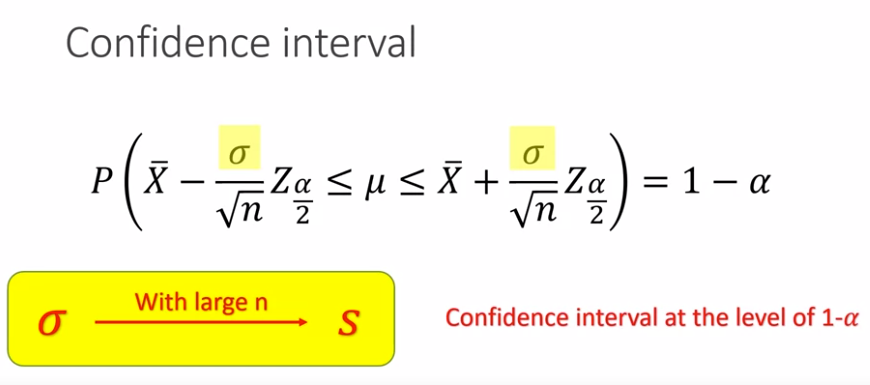

In [113]:
from IPython.display import Image
Image(filename='confidence interval 2.png')

In [ ]:
Image(filename='standardize the normal variable.png')

In [110]:
# Lets build 90% confidence interval for log return
sample_size = df['LogReturn'].shape[0]
sample_mean = df['LogReturn'].mean()
sample_std = df['LogReturn'].std(ddof=1) / sample_size**0.5

# left and right quantile
z_left = norm.ppf(0.05)
z_right = norm.ppf(0.95)

# upper and lower bound
interval_left = sample_mean + z_left*sample_std
interval_right = sample_mean + z_right*sample_std

In [118]:
print('95% Confidence Interval is:')
print('Interval : (', interval_left, ' ', interval_right, ')')

95% Confidence Interval is:
Interval : ( -0.00021287037024778522   0.001478444082848381 )


#### 95% confidence interval tells you that there will be 95% chance that the average stock return lies between "interval_left"  and "interval_right".

# Hypothesis testing

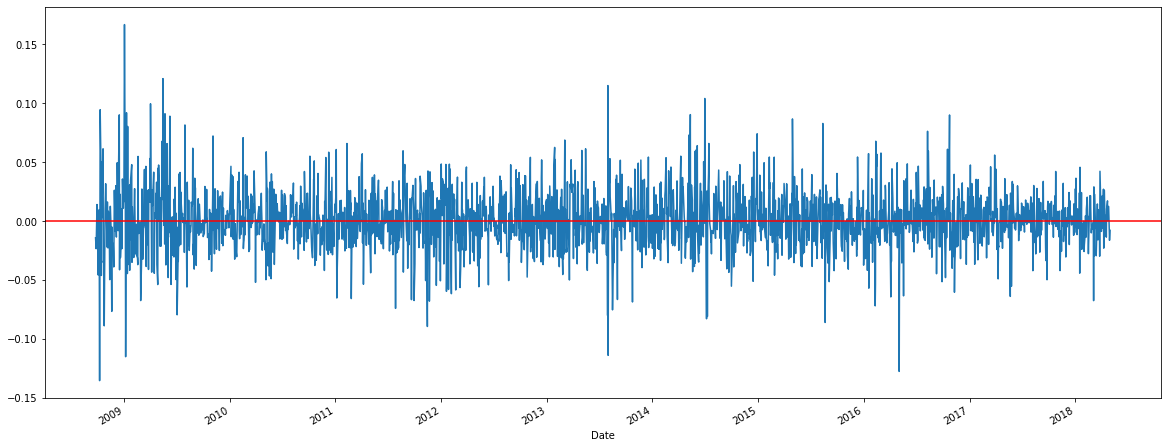

In [120]:
# Log return goes up and down during the period
df['LogReturn'].plot(figsize=(20, 8))
plt.axhline(0, color='red')
plt.show()

## Steps involved in testing a claim by hypothesis testing

### Step 1: Set hypothesis

#### H0:μ=0, Ha:μ≠0
#### H0 means the average stock return is 0, H1 means the average stock return is not equal to 0

### Step 2: Calculate test statistic

In [122]:
n = df['LogReturn'].shape[0]

# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

59.8177796697955


### Step 3: Set desicion criteria

In [123]:
# confidence level
alpha = 0.05

zleft = norm.ppf(alpha/2, 0, 1)
zright = -zleft  # z-distribution is symmetric 
print(zleft, zright)

-1.9599639845400545 1.9599639845400545


### Step 4: Make decision - shall we reject H0?

In [124]:
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright or zhat<zleft))

At significant level of 0.05, shall we reject: True


### One Tail Test 

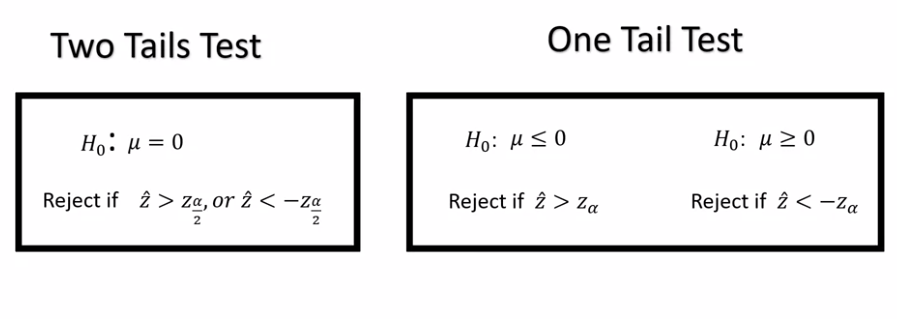

In [130]:
Image(filename='tail tests.png')

### H0:μ≤0   Ha:μ>0

In [125]:
# if sample size n is large enough, we can use z-distribution, instead of t-distribtuion
# mu = 0 under the null hypothesis
zhat = (sample_mean - 0)/(sample_std/n**0.5)
print(zhat)

59.8177796697955


In [126]:
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, zhat>zright))

At significant level of 0.05, shall we reject: True


### An alternative method: p-value

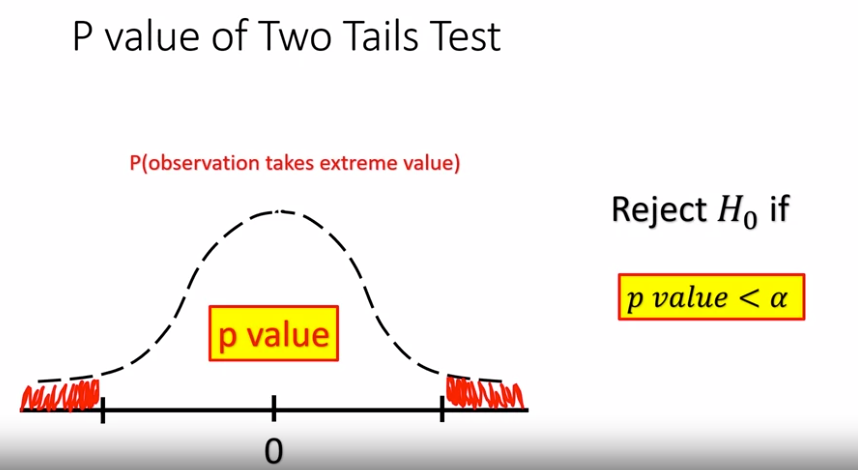

In [133]:
Image(filename='p value.png')

In [132]:
# step 3 (p-value)
p = 1 - norm.cdf(zhat, 0, 1)
print(p)
# step 4
print('At significant level of {}, shall we reject: {}'.format(alpha, p < alpha))

0.0
At significant level of 0.05, shall we reject: True
